# Conceção e otimização de modelos de Machine Learning

### Dados
Neste trabalho, será usado o dataset <em>data.csv</em>

Este dataset contem casos 4 600 e 18 features, incluindo:

- date
- price
- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- waterfront
- view
- condition
- sqft_above
- sqft_basement
- yr_built
- yr_renovated
- street
- city
- statezip
- country 

## Importar Bibliotecas

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## Ler Dados

In [349]:
# https://www.kaggle.com/datasets/shree1992/housedata
data = pd.read_csv('datasets/data.csv')

In [350]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [351]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [352]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [353]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## 1. Valores em Falta

In [354]:
data.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [355]:
data.drop(['country'],axis=1,inplace=True)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [356]:
data.drop(['date'],axis=1,inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [357]:
data.duplicated().sum()

0

In [358]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
dtype: int64

<Axes: >

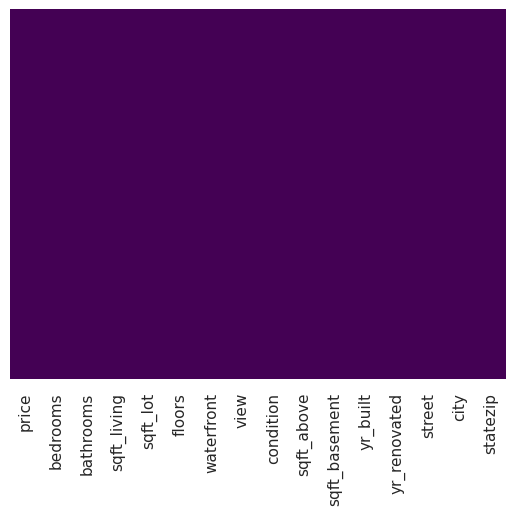

In [359]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [360]:
data.nunique()

price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
dtype: int64

### OUTLIERS

Price

In [361]:
from scipy import stats


z_scores = stats.zscore(data['price'].astype(float))
threshold = 3
df_no_outliers = data[(z_scores < threshold)]
print(df_no_outliers.shape)
df_no_outliers['price'].astype(float).describe()

data['price'].astype(float)
lower_limit = data['price'].quantile(0.09)
upper_limit = data['price'].quantile(0.99)
data['price'] = data['price'].clip(lower_limit, upper_limit)
data['price'].describe()



(4566, 16)


count    4.600000e+03
mean     5.439019e+05
std      3.209044e+05
min      2.348645e+05
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.005220e+06
Name: price, dtype: float64

<Axes: xlabel='price'>

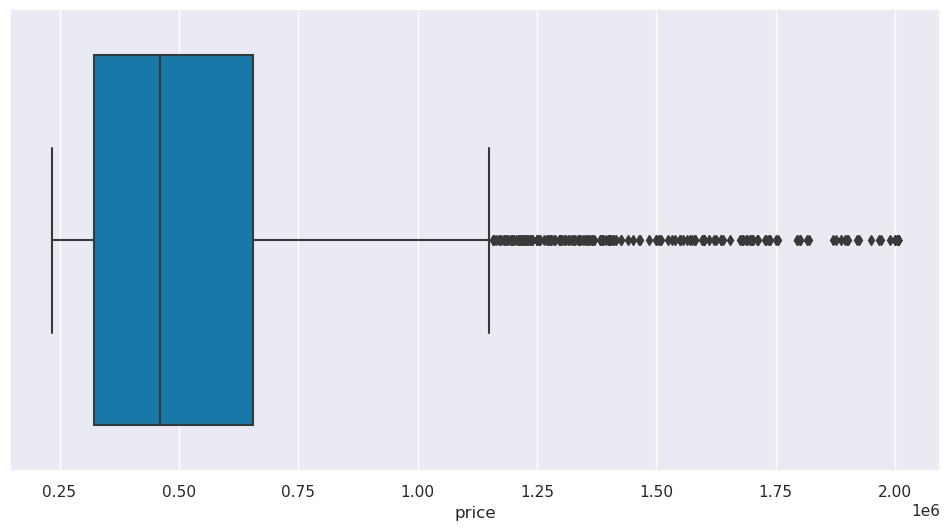

In [362]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data['price'],palette='winter')

## 2. Tratamento de dados categóricos

In [363]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2005220.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [364]:
lb = LabelEncoder()

StreetLe = lb.fit(data['street'])

data['street'] = StreetLe.transform(data['street'])

data['street'].value_counts()

street
2193    4
2165    3
4431    2
3676    2
227     2
       ..
809     1
2738    1
3685    1
27      1
1514    1
Name: count, Length: 4525, dtype: int64

In [365]:
CityLe = lb.fit(data['city'])

data['city'] = CityLe.transform(data['city'])

data['city'].value_counts()

city
35    1573
32     293
3      286
31     235
16     187
19     187
18     185
1      176
33     175
14     148
36     123
42     115
21      96
23      86
6       74
38      71
17      66
10      58
27      50
9       43
11      42
20      36
5       33
25      33
34      29
40      29
41      29
12      28
7       22
26      18
8       11
22      11
13      11
4        9
30       7
28       6
0        5
43       4
37       3
29       2
24       2
15       1
39       1
2        1
Name: count, dtype: int64

In [366]:
data['statezip'].value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

In [367]:
data['statezip'] = data['statezip'].str.replace('WA','').astype(int)

In [368]:
data['statezip'].value_counts()

statezip
98103    148
98052    135
98117    132
98115    130
98006    110
        ... 
98047      6
98288      3
98050      2
98354      2
98068      1
Name: count, Length: 77, dtype: int64

In [369]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,98133
1,2005220.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,98052


In [370]:
data.price.describe()


count    4.600000e+03
mean     5.439019e+05
std      3.209044e+05
min      2.348645e+05
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.005220e+06
Name: price, dtype: float64

In [371]:
print("max: ",data.price.max(), "min: ",data.price.min(), "mean: ",data.price.mean(), "median: ",data.price.median())

max:  2005220.000000005 min:  234864.49999999997 mean:  543901.9499029946 median:  460943.46153850004


In [372]:
#'Desconhecido:-1','Muito Baixo:0', 'Baixo:1', 'Médio:2', 'Alto:3', 'Muito Alto:4'
labels = ['0','1', '2', '3', '4']

bins = [0, 250000, 450000, 800000, 1200000, 30000000]

# Crie uma nova coluna 'Levy_Category' com as categorias
data['price'] = pd.cut(data['price'], bins=bins, labels=labels, right=False)

# Visualize as categorias
print(data['price'].value_counts())

price
2    1733
1    1655
0     537
3     452
4     223
Name: count, dtype: int64


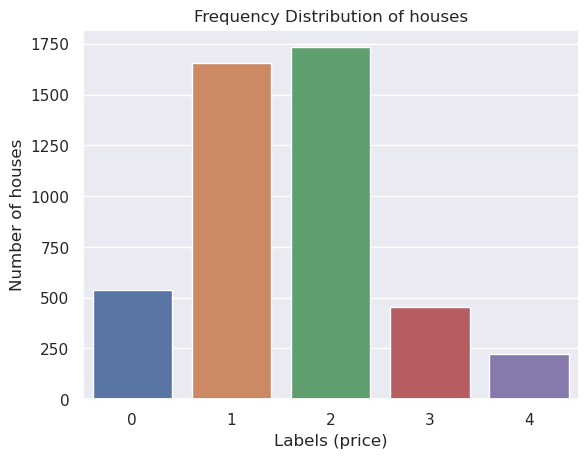

In [373]:
price_count = data['price'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=price_count.index, y=price_count.values)
plt.title('Frequency Distribution of houses')
plt.ylabel('Number of houses', fontsize=12)
plt.xlabel('Labels (price)', fontsize=12)
plt.show()

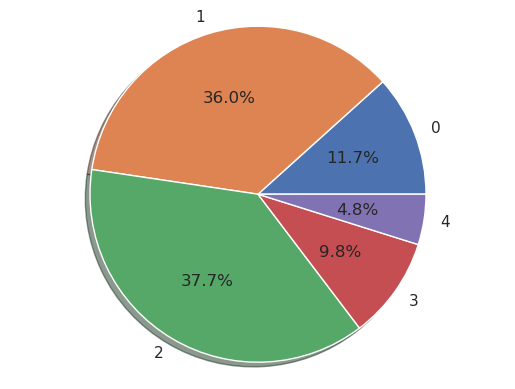

In [374]:
labels = data['price'].astype('category').cat.categories.tolist()
counts = data['price'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [375]:
# data.Mileage = data.Mileage.map(lambda x: x.rstrip(' km'))
# data.Mileage = data.Mileage.astype('float')
# #data['Mileage'] = data['Mileage'].str.replace(' km', '')
# print(data['Mileage'].median())
# print("max -> " ,data['Mileage'].max(), "| min -> ", data['Mileage'].min())

In [376]:
data.sqft_living.describe()

count     4600.000000
mean      2139.346957
std        963.206916
min        370.000000
25%       1460.000000
50%       1980.000000
75%       2620.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [377]:
print("max: ",data.sqft_living.max(), "min: ",data.sqft_living.min(), "mean: ",data.sqft_living.mean(), "median: ",data.sqft_living.median())

max:  13540 min:  370 mean:  2139.3469565217392 median:  1980.0


In [378]:
#'Novo :0', 'Poucos Km's:1', 'Medio Km's:2', 'Muitos km's :3', 'Muitos Muitos Km's:4'
labels = ['0', '1', '2', '3', '4']

bins = [ 0, 65000, 130000, 200000,500000, 10000000000000]

# Crie uma nova coluna 'Levy_Category' com as categorias
data[''] = pd.cut(data[''], bins=bins, labels=labels, right=False)

# Visualize as categorias
print(data['Mileage'].value_counts())

KeyError: ''

In [ ]:
data['Price'].median()

In [ ]:
# #'Novo :0', 'Poucos Km's:1', 'Medio Km's:2', 'Muitos km's :3', 'Muitos Muitos Km's:4'
# labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# bins = [ 0, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 250000 , 500000, 10000000000000]

# # Crie uma nova coluna 'Levy_Category' com as categorias
# data['Price'] = pd.cut(data['Price'], bins=bins, labels=labels, right=False)

# # Visualize as categorias
# print(data['Price'].value_counts())

In [ ]:
plt.figure(figsize=(12,10))
corr = data.corr()["price"]
corr[np.argsort(corr, axis=0)[::-1]]
corr = corr[1:] 
corr.plot(kind='barh') 

plt.title("Correlação entre variáveis e Price")

In [ ]:
plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm')

In [ ]:
sns.pairplot(data)

In [ ]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='price',y='sqft_living',data=data)

In [ ]:
data.info()

In [ ]:
data = pd.pandas.get_dummies(data)

data